# 01. Data Exploration & Feature Analysis

This notebook provides a robust overview of the gas fee dataset used for training.
It validates the data format, checks for missing values, and visualizes key feature correlations.

**Core Modules Tested:**
- Data Loading (Parquet)
- Feature Distribution

In [5]:
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Project Root
project_root = Path('..').resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

data_path = project_root / 'data' / 'features.parquet'
print(f"Data Path: {data_path}")

Data Path: D:\SKRIPSI\gas-ml\data\features.parquet


## 1. Load Data

In [6]:
if not data_path.exists():
    print("❌ Dataset not found! Please run the data acquisition pipeline first.")
else:
    df = pd.read_parquet(data_path)
    print(f"✅ Loaded {len(df):,} samples")
    print(f"   Time range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    
    # Info
    print("\n--- Feature Info ---")
    print(df.info())

✅ Loaded 9,994 samples
   Time range: 1765237524 to 1765360476

--- Feature Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 5 to 9998
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   number                      9994 non-null   int64         
 1   timestamp                   9994 non-null   int64         
 2   baseFeePerGas               9994 non-null   int64         
 3   gasUsed                     9994 non-null   int64         
 4   gasLimit                    9994 non-null   int64         
 5   txCount                     9994 non-null   int64         
 6   difficulty                  9994 non-null   int64         
 7   totalDifficulty             9994 non-null   int64         
 8   datetime                    9994 non-null   datetime64[ns]
 9   hour_of_day                 9994 non-null   int32         
 10  day_of_week                 9994 non-nul

## 2. Target Variable Analysis (Next Base Fee)

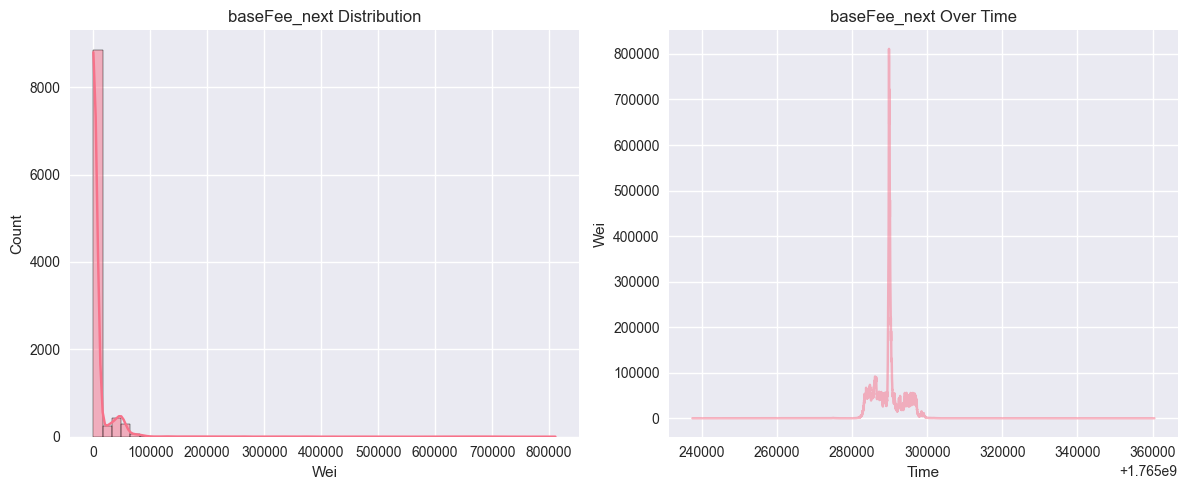

In [7]:
if 'baseFee_next' in df.columns:
    target_col = 'baseFee_next'
else:
    # Fallback or derived
    print("Warning: 'baseFee_next' column not found. Using 'baseFee' shifted.")
    target_col = 'baseFee'

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[target_col], bins=50, kde=True)
plt.title(f"{target_col} Distribution")
plt.xlabel("Wei")

plt.subplot(1, 2, 2)
plt.plot(df['timestamp'], df[target_col], alpha=0.5)
plt.title(f"{target_col} Over Time")
plt.xlabel("Time")
plt.ylabel("Wei")
plt.tight_layout()
plt.show()

## 3. Correlation Matrix

d:\SKRIPSI\.venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\SKRIPSI\.venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


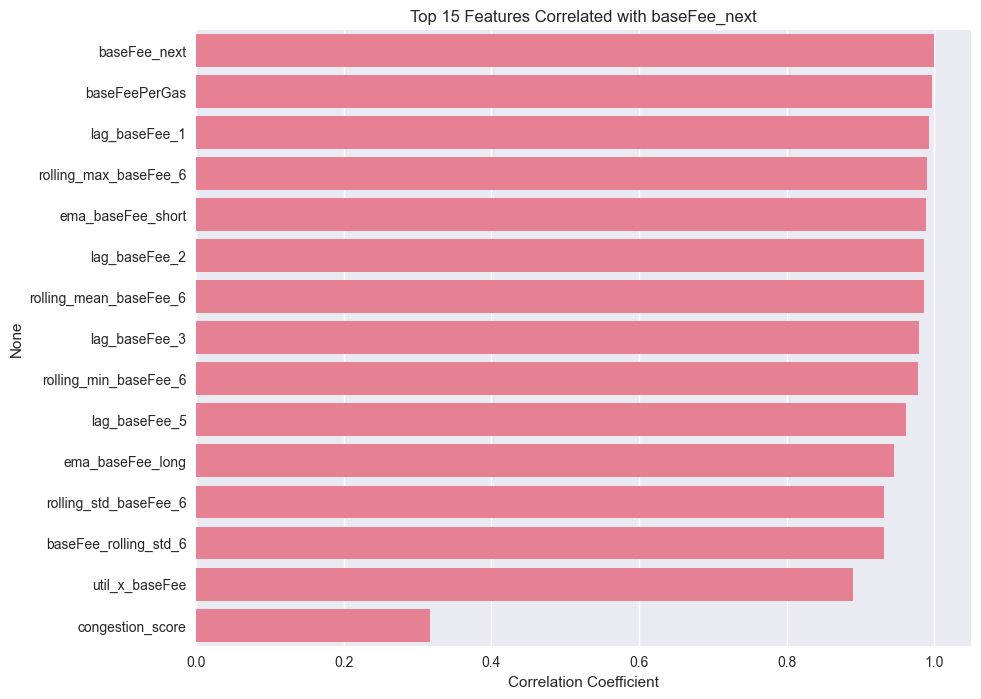

In [8]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation with target
if target_col in numeric_df.columns:
    corr = numeric_df.corrwith(numeric_df[target_col]).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 8))
    top_corr = corr.head(15)
    sns.barplot(x=top_corr.values, y=top_corr.index)
    plt.title(f"Top 15 Features Correlated with {target_col}")
    plt.xlabel("Correlation Coefficient")
    plt.show()